In [1]:
# computational libraries
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np

# plotting libraries
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# preprocessing
from sklearn.preprocessing import StandardScaler

# models
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


This cell constructs a Series called y that contains the target feature - in this case, hourly electricity demand.

In [2]:
# read clean electricity data to create target variable array y
elec = pd.read_csv('../data/elec_clean.csv',index_col=0)
elec.index = pd.to_datetime(elec.index,format='%Y-%m-%d %H:00:00')

# remove Davenport for now because it is missing most of June and July
elec.drop('Davenport',axis=1,inplace=True)

y = pd.Series(elec.iloc[:, 0:11].sum(axis=1))

This cell constructs a DataFrame called X that contains the covariate data. Here, one-hot dates, weather lag, and electricity lag features are added for a total of 45 covariates.

In [7]:
# create X as a copy of y
X = pd.DataFrame(y,columns=['elec'])

# add boolean date features
dates = pd.read_csv('../data/one_hot_dates.csv',index_col=0)
dates.index = pd.to_datetime(dates.index,format='%Y-%m-%d %H:00:00')
X = X.join(dates)

# add electricity lag features (be careful with this)
for i in range(1,7):
    X['elec -'+str(i)] = np.append(np.array([np.nan]*i),X['elec'].values[0:len(y)-i])
X = X.drop('elec',axis=1)

# process weather features (maybe move this to the end of the weather pipeline before export?)
weather = pd.read_csv('../data/weather_clean.csv',index_col=0)
weather.index = pd.to_datetime(weather.index,format='%Y-%m-%d %H:00:00')
weather = weather.iloc[:,[0,4]]
for k in weather.columns:
    for i in range(1,7):
        weather[k+' -'+str(i)] = np.append(np.array([np.nan]*i),weather[k].values[0:len(weather)-i])

# truncate the weather to the range considered, then scale it
weather = weather.loc[y.index[0]:y.index[len(y)-1]]
weather = 

# add weather features, remove NaN's that were introduced with elec lag variables
X = X.join(weather)

# truncate y and X to match each other (this step is only necessary if using elec lag features)
X = X.iloc[6:]
y = y.iloc[6:]

This cell defines the train and test sets for a random day in the dataset.

In [54]:
# choose a random day between Jan 10 and July 10 to test
split_times = pd.date_range(start='2018-01-10 08:00:00',end='2018-07-10 08:00:00',freq='D')
split_time = split_times[np.random.randint(len(start_times))]
end_time = split_time + pd.DateOffset(hours=39)

# define train set before the split and test the following day
X_train = X.loc[X.index <= split_time].copy()
X_test = X.loc[(X.index > split_time) & (X.index <= end_time)].copy()
y_train = y.loc[y.index <= split_time].copy()
y_test = y.loc[(y.index > split_time) & (y.index <= end_time)].copy()

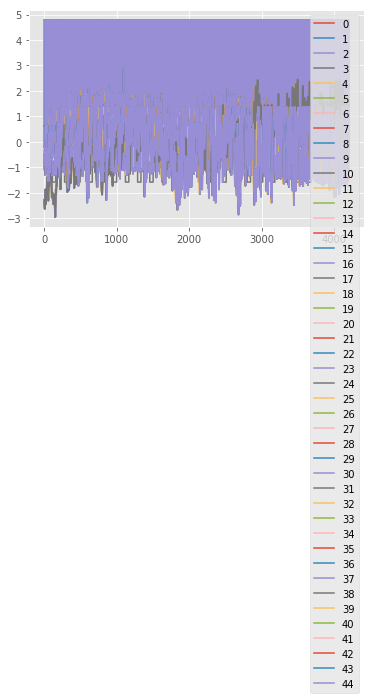

In [59]:
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))